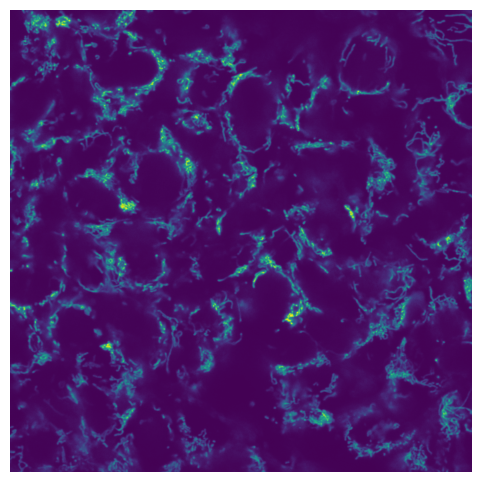

In [1]:
import skimage
import czifile
import numpy as np
import matplotlib.pyplot as plt
#import cellpose

# read the single example image
image_path = r'images\ADAM_01.czi'
image = czifile.imread(image_path)
image = np.squeeze(image)

fig, ax = plt.subplots(figsize=(6, 6))
plt.axis("off")
ax.imshow(image)
#plt.savefig("raw_tmrm.png")
plt.show()

Methods for image adjustment

Generate mask with otsu

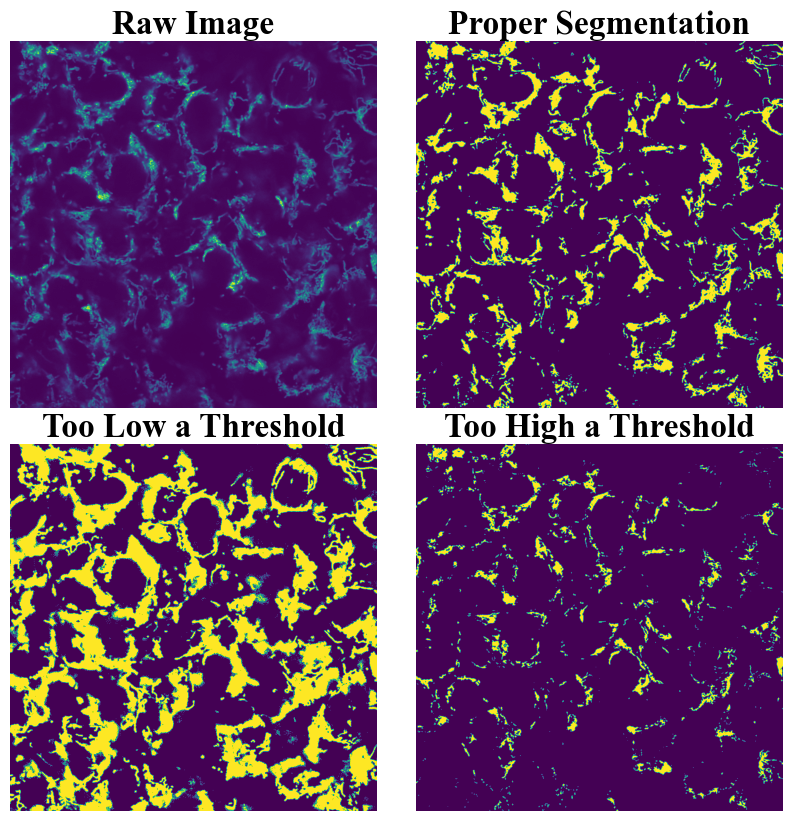

In [2]:
normed_image = (image - image.min()) / (image.max() - image.min()) 
# set three thresholds for different segmentation
threshold_low = 0.05
threshold_high = 0.29
threshold_normal = 0.15
# apply each threshold to generate three masks
mask_low = normed_image > threshold_low
mask_high = normed_image > threshold_high
mask_normal = normed_image > threshold_normal
# define fonts for titles
title_font = {'fontname': 'Times New Roman', 'size': 24, 'weight': 'bold'}

# fig, ax = plt.subplots(1, 4, figsize=(20, 8))
# plt.subplots_adjust(wspace=0.075)
# ax[0].axis('off')
# ax[0].set_title('Raw Image', fontdict=title_font)
# ax[0].imshow(normed_image)
# ax[1].axis('off')
# ax[1].set_title('Proper Segmentation', fontdict=title_font)
# ax[1].imshow(mask_normal)
# ax[2].axis('off')
# ax[2].set_title('Too Low a Threshold', fontdict=title_font)
# ax[2].imshow(mask_low)
# ax[3].axis('off')
# ax[3].set_title('Too High a Threshold', fontdict=title_font)
# ax[3].imshow(mask_high)
# plt.savefig('seg_problem_figure_long.pdf')
# plt.show()


fig, ax = plt.subplots(2, 2, figsize=(10, 10))
plt.subplots_adjust(wspace=0.1, hspace=0.1)
ax[0, 0].axis('off')
ax[0, 0].set_title('Raw Image', fontdict=title_font)
ax[0, 0].imshow(normed_image)
ax[0, 1].axis('off')
ax[0, 1].set_title('Proper Segmentation', fontdict=title_font)
ax[0, 1].imshow(mask_normal)
ax[1, 0].axis('off')
ax[1, 0].set_title('Too Low a Threshold', fontdict=title_font)
ax[1, 0].imshow(mask_low)
ax[1, 1].axis('off') 
ax[1, 1].set_title('Too High a Threshold', fontdict=title_font)
ax[1, 1].imshow(mask_high)
plt.savefig('seg_problem_figure_square.jpeg')
plt.show()


Proper and improper cellpose segmentation & labelling

In [2]:
# import cellpose
from cellpose import models, utils, io
# load the model
model = models.Cellpose(gpu=False, model_type='cyto')

ModuleNotFoundError: No module named 'cellpose'

In [5]:
# try cellpose segmentation with FRAP from MMP FRAP
image_3_file = r'images\Dox_TMRM_25nM_3hrs_FRAP_18.czi'
image_3 = czifile.imread(image_3_file)
image_3 = np.squeeze(image_3)
# 13, 18
frap = image_3[0]

frap_adjust = skimage.exposure.equalize_adapthist(frap)
#frap_adjust = skimage.exposure.rescale_intensity(frap_adjust)

frap_adjust_poor = skimage.exposure.equalize_hist(frap)

# use cellpose to segment cells
cellpose_masks_syn_proper, flows, styles, diams = model.eval(frap_adjust, diameter=150) # 64 is also good

cellpose_masks_syn_improper, flows, styles, diams = model.eval(frap_adjust_poor, diameter=100) # 64 is also good

# font for titles of each plot
title_font = {'fontname': 'Times New Roman', 'size': 24, 'weight': 'bold'}
# print the figure
fig, ax = plt.subplots(1, 3, figsize=(18, 7))
plt.subplots_adjust(wspace=0.1, hspace=0.1)
ax[0].axis('off')
ax[0].set_title('Raw Image', fontdict=title_font)
ax[0].imshow(frap_adjust)
ax[1].axis('off')
ax[1].set_title('Proper Cellpose Segmentation', fontdict=title_font)
ax[1].imshow(cellpose_masks_syn_proper)
ax[2].axis('off')
ax[2].set_title('Improper Cellpose Segmentation', fontdict=title_font)
ax[2].imshow(cellpose_masks_syn_improper)
plt.savefig('cellpose_seg_problem_figure.jpeg')
plt.show()

NameError: name 'model' is not defined

In [11]:
%pip list | grep openpyxl

openpyxl                   3.1.5
Note: you may need to restart the kernel to use updated packages.
